In [1012]:
import pandas as pd
import re
!python -m nltk.downloader stopwords
from nltk.tokenize import sent_tokenize
import os
import json
import gzip
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1013]:
gd = pd.read_csv(r"/content/sample_data/Gift_Cards.csv")

In [1014]:
gd.shape

(147193, 4)

In [1015]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147193 entries, 0 to 147192
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   B001GXRQW0     147193 non-null  object 
 1   APV13CM0919JD  147193 non-null  object 
 2   1.0            147193 non-null  float64
 3   1229644800     147193 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [1016]:
### load the review meta data

Group_data = []
with gzip.open(r"/content/sample_data/Gift_Cards_5.json.gz") as f:
    for l in f:
        Group_data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(Group_data))

2972


In [1017]:
print(Group_data[15:])

[{'overall': 5.0, 'verified': True, 'reviewTime': '03 18, 2018', 'reviewerID': 'A3BNRL2SCE6CGU', 'asin': 'B004Q7CK9M', 'style': {'Gift Amount:': ' 15'}, 'reviewerName': 'karl zahler', 'reviewText': 'they are gift cards', 'summary': 'Five Stars', 'unixReviewTime': 1521331200}, {'overall': 5.0, 'verified': True, 'reviewTime': '03 12, 2018', 'reviewerID': 'A1FKMXROBDOI7W', 'asin': 'B004Q7CK9M', 'style': {'Gift Amount:': ' 25'}, 'reviewerName': 'D.M.', 'reviewText': 'Xmas gift.', 'summary': 'Five Stars', 'unixReviewTime': 1520812800}, {'overall': 4.0, 'verified': True, 'reviewTime': '03 5, 2018', 'reviewerID': 'A3NNNJAQ22RN10', 'asin': 'B004Q7CK9M', 'style': {'Gift Amount:': ' 25'}, 'reviewerName': 'Joyce Martin', 'reviewText': 'This was a birthday gift', 'summary': 'Four Stars', 'unixReviewTime': 1520208000}, {'overall': 5.0, 'verified': True, 'reviewTime': '03 2, 2018', 'reviewerID': 'AEDHVVRO3Y938', 'asin': 'B004Q7CK9M', 'style': {'Gift Amount:': ' 40'}, 'reviewerName': 'darlene r', 're

In [1018]:
df = pd.DataFrame.from_dict(Group_data)
print(len(df))

2972


In [1019]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4.0,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5.0,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5.0,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5.0,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


# **Dataset Exploration**

**Counts and Averages**

In [1020]:
df.describe()

,overall,unixReviewTime
count,2972.000000,2.972000e+03
mean,4.885262,1.476136e+09
std,0.484660,3.379616e+07
min,1.000000,1.327968e+09
25%,5.000000,1.454890e+09
50%,5.000000,1.482710e+09
75%,5.000000,1.500271e+09
max,5.000000,1.534896e+09


**Overall Column Exploration**

In [1021]:
df['overall'].describe()

count    2972.000000
mean     4.885262   
std      0.484660   
min      1.000000   
25%      5.000000   
50%      5.000000   
75%      5.000000   
max      5.000000   
Name: overall, dtype: float64

In [1022]:
df['overall'].value_counts()

5.0    2752
4.0    154 
3.0    33  
1.0    22  
2.0    11  
Name: overall, dtype: int64

Text(0, 0.5, 'Number of reviews')

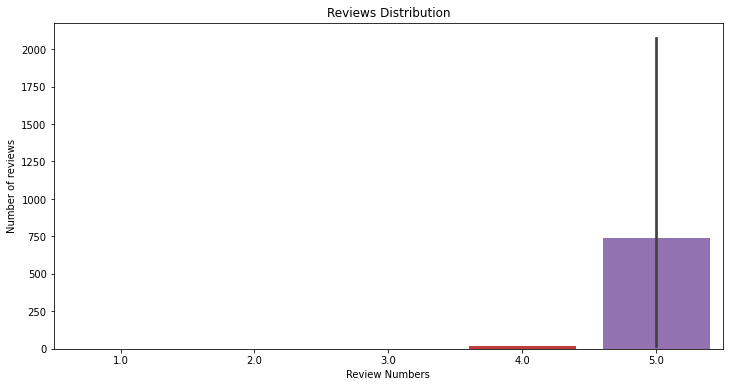

In [1023]:
plt.figure(figsize=(12,6))
plt.title("Reviews Distribution")
sns.barplot(x=df['overall'],y= df['overall'].value_counts())
plt.xlabel('Review Numbers')
plt.ylabel('Number of reviews')

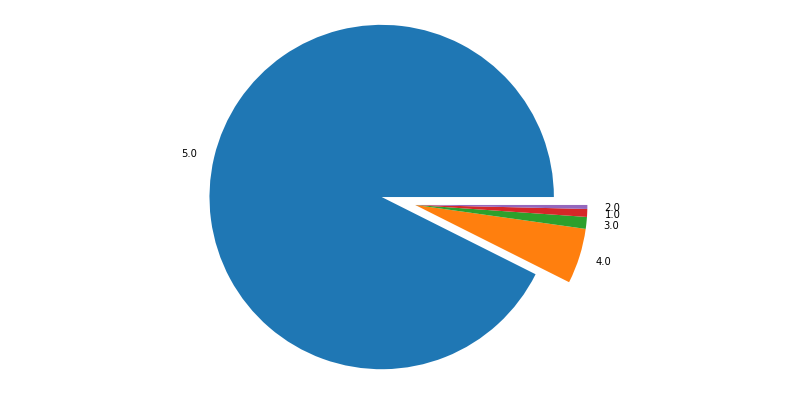

In [1024]:
plt.figure(figsize=(14,7))
myexplode = [0.2, 0, 0, 0,0]
plt.pie(df['overall'].value_counts(),labels=['5.0','4.0','3.0','1.0','2.0'],explode=myexplode)
plt.axis('equal')

# Show the plot
plt.show()

**Product column Exploration**

In [1025]:
df['asin'].describe()

count     2972      
unique    148       
top       B00AR51Y5I
freq      94        
Name: asin, dtype: object

In [1026]:
df['asin'].value_counts()

B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
              ..
B016J1LGPG    5 
B01CT5PHJ2    5 
B00BXLSPGQ    5 
B0188LOK7G    5 
B01B25LU7S    4 
Name: asin, Length: 148, dtype: int64

Text(0, 0.5, 'Product')

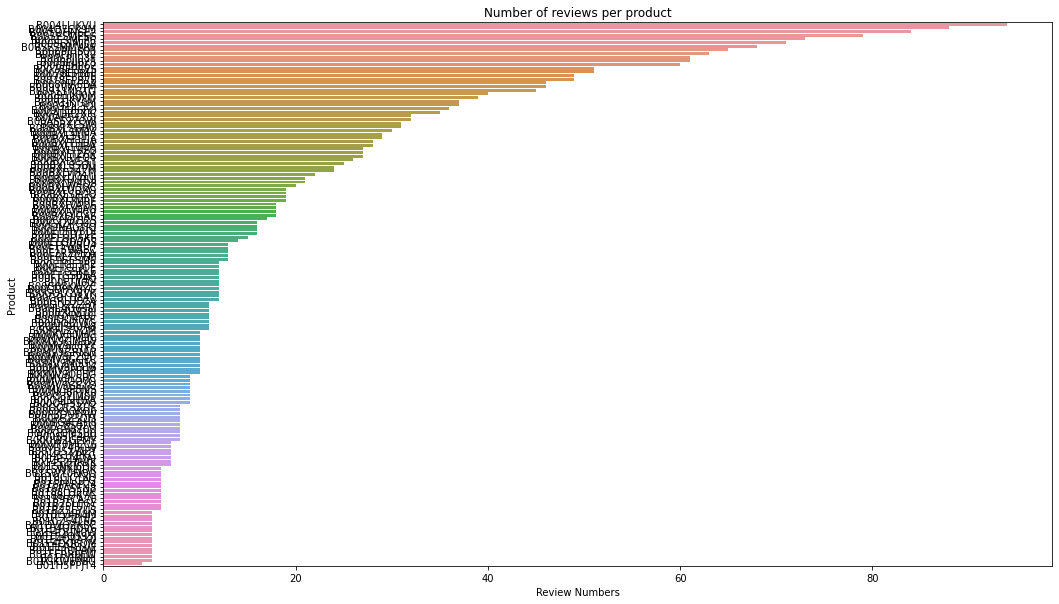

In [1027]:
plt.figure(figsize=(17,10))
plt.title("Number of reviews per product")
sns.barplot(x=df['asin'].value_counts(),y=df['asin'].unique())
plt.xlabel('Review Numbers')
plt.ylabel('Product')

In [1028]:
mask = df['asin'] == 'B00AR51Y5I'
selected_data = df.loc[mask,['reviewText','overall']]
print(selected_data)

                                                                                                                                                                      reviewText  \
731  best                                                                                                                                                                          
732  nice gifts                                                                                                                                                                    
733  My friend enjoys his coffee                                                                                                                                                   
734  Good                                                                                                                                                                          
735  hope this is getting used                                                                      

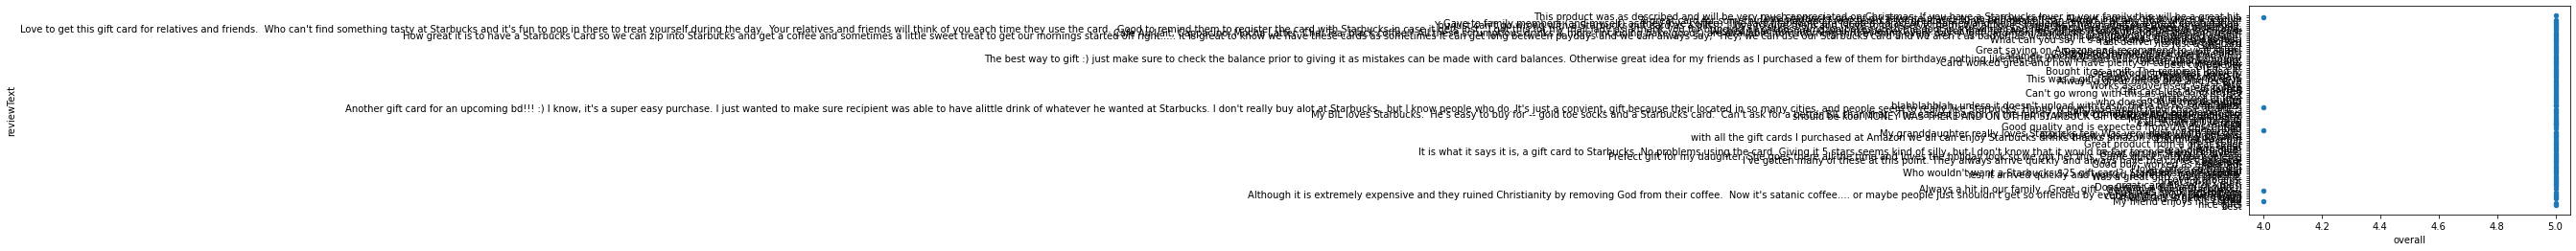

In [1029]:
selected_data.plot(x='overall', y='reviewText', kind='scatter')

# show the plot
plt.show()

In [1030]:
print(selected_data.value_counts())

reviewText                                                                                                                                                                   overall
Gift                                                                                                                                                                         5.0        2
great                                                                                                                                                                        5.0        2
<3                                                                                                                                                                           5.0        1
best                                                                                                                                                                         5.0        1
You just can't go wrong with a Starbucks gift card as a gift!!! I love to g

In [1031]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['asin'],
    xbins=dict( # bins used for histogram
        start=0,
        end=100,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='PRODUCT REVIEW DISTRIBUTION',
    xaxis_title_text='PRODUCT',
    yaxis_title_text='REVIWES', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [1032]:
import plotly.express as px
fig = px.histogram(df, x="asin", color="overall", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of PRODUCT Vs REVIEWS", 
                   #labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

**Reviewer ID column Exploration**

In [1033]:
df['reviewerID'].describe()

count     2972          
unique    458           
top       A1U1G73EI5IRZF
freq      32            
Name: reviewerID, dtype: object

In [1034]:
df['reviewerID'].value_counts()

A1U1G73EI5IRZF    32
A13H0YP0J8PM6V    28
A3OHGWD8LIDZ8K    22
A2RTTRR421J9KG    19
A1SVYJFIASQ46Z    19
                  ..
ASJ7USDIR4PL0     5 
A3OZ1Q3VI8H8EO    5 
AIG7PZQOVH31T     5 
A2M5PNYYFWSJMD    5 
A2RV5MAIOHKMW0    5 
Name: reviewerID, Length: 458, dtype: int64

In [1035]:
mask = df['reviewerID'] == 'A1U1G73EI5IRZF'
selected_data = df.loc[mask,['reviewText','overall']]
print(selected_data)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    reviewText  \
81    The design of the card is gorgeous. It's a perfect gift for your friends or family.                                                                                                             

In [1036]:
print(selected_data.value_counts())

reviewText                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                overall
$5 discount on this e-gift card. This is great saving. Love to eat traditional breakfast at Steak and Shake!                                                                                          

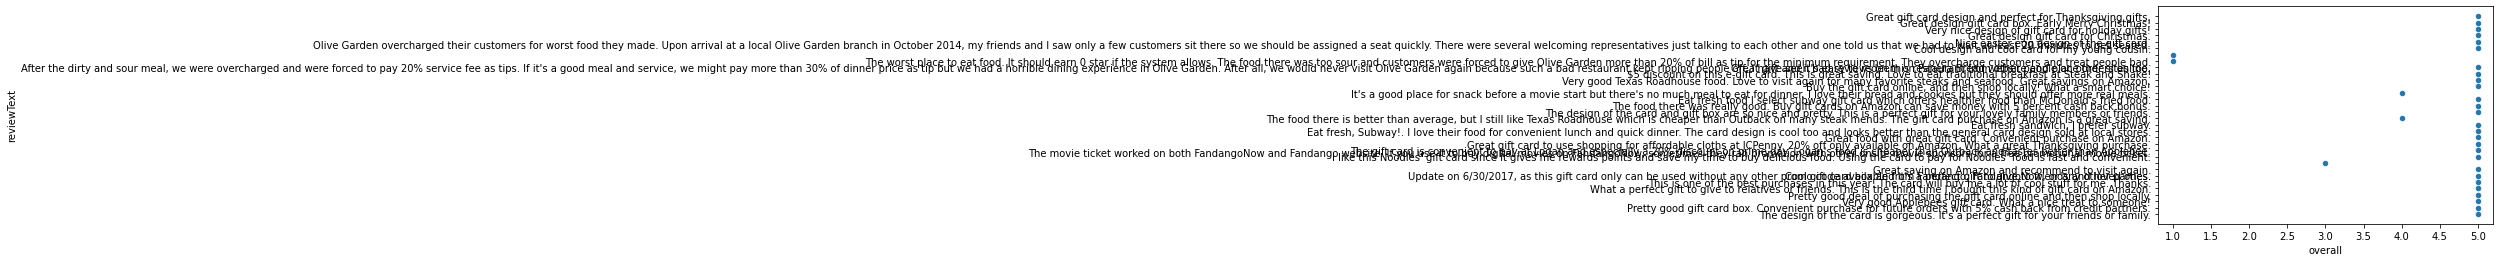

In [1037]:

selected_data.plot(x='overall', y='reviewText', kind='scatter')

# show the plot
plt.show()

In [1038]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['reviewerID'],
    xbins=dict( # bins used for histogram
        start=0,
        end=50,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='USER DISTRIBUTION',
    xaxis_title_text='USER',
    yaxis_title_text='REVIWES', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [1039]:
import plotly.express as px
fig = px.histogram(df, x="reviewerID", color="overall", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of reviewerID Vs REVIEWS", 
                   #labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

**reviewerName column exploration**

In [1040]:
df['reviewerName'].value_counts()

Amazon Customer     244
Victor              32 
Vincent Marrero     28 
Kindle Customer     26 
Sherri D.           22 
                    .. 
Kitty Girl Linda    1  
Ralphie             1  
5xNana              1  
Gary L Goodhart     1  
S. Eves             1  
Name: reviewerName, Length: 429, dtype: int64

In [1041]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['reviewerName'],
    xbins=dict( # bins used for histogram
        start=0,
        end=250,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='USER DISTRIBUTION',
    xaxis_title_text='USER',
    yaxis_title_text='REVIWES', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [1042]:
import plotly.express as px
fig = px.histogram(df, x="reviewerName", color="overall", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of reviewerName Vs REVIEWS", 
                   #labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [1043]:
df.to_csv('gifts_review.csv')

In [1044]:
print('MISSING VALUES'.center (83, '*'))
for col in df.columns:
    if df[col].isnull().sum()>0:
        miss_df = df[col]
        miss_df = pd.DataFrame(miss_df)
        print(miss_df.columns)

***********************************MISSING VALUES**********************************
Index(['style'], dtype='object')
Index(['reviewText'], dtype='object')
Index(['vote'], dtype='object')
Index(['image'], dtype='object')


In [1045]:
print('DUPLICATED VALUES'.center (83, '*'))
for col in df.columns:
    duplicate = df[col].duplicated()
    duplicate = pd.DataFrame(duplicate)
    print(duplicate.columns)

*********************************DUPLICATED VALUES*********************************
Index(['overall'], dtype='object')
Index(['verified'], dtype='object')
Index(['reviewTime'], dtype='object')
Index(['reviewerID'], dtype='object')
Index(['asin'], dtype='object')
Index(['style'], dtype='object')
Index(['reviewerName'], dtype='object')
Index(['reviewText'], dtype='object')
Index(['summary'], dtype='object')
Index(['unixReviewTime'], dtype='object')
Index(['vote'], dtype='object')
Index(['image'], dtype='object')


In [1046]:
type(df)

pandas.core.frame.DataFrame

In [1047]:
df.dtypes

overall           float64
verified          bool   
reviewTime        object 
reviewerID        object 
asin              object 
style             object 
reviewerName      object 
reviewText        object 
summary           object 
unixReviewTime    int64  
vote              object 
image             object 
dtype: object

In [1048]:
import pandas as pd
import numpy as np

df = df.sample(n=np.random.randint(500, 1000))

df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
257,5.0,True,"09 22, 2016",AZKLLDZ59Q4A1,B006PJHP62,NaN,Myra J. Wheeler,Good,Five Stars,1474502400,NaN,NaN
950,5.0,True,"02 15, 2018",AKT3Z3O3T26PL,B00BXLTZ6K,NaN,Kimberly M.,Great,Five Stars,1518652800,NaN,NaN
2845,5.0,True,"01 5, 2017",A3MXDV25XUTB16,B01FERQPAM,{'Gift Amount:': ' 0'},Elaine Anderson,Why would you rate a gift card?,Five Stars,1483574400,NaN,NaN
2190,5.0,True,"11 28, 2016",A2VZWIEOT8UVIR,B00O4I5S7O,NaN,Amazon Customer,thanks,Five Stars,1480291200,3,NaN
490,5.0,True,"12 18, 2017",A2V1J3JT5OOZFO,B0091JKY0M,{'Gift Amount:': ' 0'},A Long-time Prime Custom,Great gift. Everyone loves Amazon,Recommended gift,1513555200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,4.0,True,"04 19, 2016",AQ07WF9O4HG65,B00DNAGTIQ,NaN,Marvin,Satisfied.,Four Stars,1461024000,NaN,NaN
2569,5.0,True,"12 12, 2016",ASMBYX11IUPJR,B0189TCA7E,NaN,Brian Miller,"Had a great time, good food",Love this restaurant,1481500800,NaN,NaN
1572,5.0,True,"08 4, 2016",AS9ARKLF5DV8R,B00F2RZMEA,NaN,SBestHNL,"CARD BETTER HAVE FUNDS ON IT ive ready too many reviews fore this and other to know that s*** sometimes happens, that it, people get cards and they have no funds on them... so we'll see... if no editing, then funds were there",FUNDS BETTER BE THERE...,1470268800,NaN,NaN
1022,5.0,True,"03 23, 2017",A3N7K2TTGUY9U,B00BXLSZPM,NaN,GG,easiest way to buy gift cards - have never had a problem,Five Stars,1490227200,NaN,NaN


In [1049]:
df['reviewText'].isnull().sum()

3

In [1050]:
import numpy as np
df['reviewText'].fillna("No review", inplace=True)

In [1051]:
df = df[df['reviewText'] != 'No review']

In [1052]:
df['reviewText'].isnull().sum()

0

In [1053]:
#labelling as per received ratings
def label(row):
    if row['overall'] in [4, 5]:
        return 'Positive'
    elif row['overall'] == 3:
        return 'Neutral'
    elif row['overall'] in [1, 2]:
        return 'Negative'

df['label'] = df.apply(lambda row: label(row), axis=1)

<ipython-input-1053-484ebd0159d9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1054]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,label
257,5.0,True,"09 22, 2016",AZKLLDZ59Q4A1,B006PJHP62,NaN,Myra J. Wheeler,Good,Five Stars,1474502400,NaN,NaN,Positive
950,5.0,True,"02 15, 2018",AKT3Z3O3T26PL,B00BXLTZ6K,NaN,Kimberly M.,Great,Five Stars,1518652800,NaN,NaN,Positive
2845,5.0,True,"01 5, 2017",A3MXDV25XUTB16,B01FERQPAM,{'Gift Amount:': ' 0'},Elaine Anderson,Why would you rate a gift card?,Five Stars,1483574400,NaN,NaN,Positive
2190,5.0,True,"11 28, 2016",A2VZWIEOT8UVIR,B00O4I5S7O,NaN,Amazon Customer,thanks,Five Stars,1480291200,3,NaN,Positive
490,5.0,True,"12 18, 2017",A2V1J3JT5OOZFO,B0091JKY0M,{'Gift Amount:': ' 0'},A Long-time Prime Custom,Great gift. Everyone loves Amazon,Recommended gift,1513555200,NaN,NaN,Positive


In [1055]:
#expanding the display of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
df= df [['reviewText','summary']]

<ipython-input-1055-617532bc0260>:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [1056]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [1057]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['reviewText'] = df['reviewText'].apply(lambda x:remove_punctuation(x))
df['reviewText']

df['summary'] = df['summary'].apply(lambda x:remove_punctuation(x))
df['summary']


<ipython-input-1057-53370124cd1d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1057-53370124cd1d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



257     Five Stars           
950     Five Stars           
2845    Five Stars           
2190    Five Stars           
490     Recommended gift     
              ...            
1489    Four Stars           
2569    Love this restaurant 
1572    FUNDS BETTER BE THERE
1022    Five Stars           
2947    Five Stars           
Name: summary, Length: 765, dtype: object

In [1058]:
df

,reviewText,summary
257,Good,Five Stars
950,Great,Five Stars
2845,Why would you rate a gift card,Five Stars
2190,thanks,Five Stars
490,Great gift Everyone loves Amazon,Recommended gift
...,...,...
1489,Satisfied,Four Stars
2569,Had a great time good food,Love this restaurant
1572,CARD BETTER HAVE FUNDS ON IT ive ready too many reviews fore this and other to know that s sometimes happens that it people get cards and they have no funds on them so well see if no editing then funds were there,FUNDS BETTER BE THERE
1022,easiest way to buy gift cards have never had a problem,Five Stars


In [1059]:
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())
df['summary'] = df['summary'].apply(lambda x: x.lower())

<ipython-input-1059-f23f779c99ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1059-f23f779c99ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1060]:
df

,reviewText,summary
257,good,five stars
950,great,five stars
2845,why would you rate a gift card,five stars
2190,thanks,five stars
490,great gift everyone loves amazon,recommended gift
...,...,...
1489,satisfied,four stars
2569,had a great time good food,love this restaurant
1572,card better have funds on it ive ready too many reviews fore this and other to know that s sometimes happens that it people get cards and they have no funds on them so well see if no editing then funds were there,funds better be there
1022,easiest way to buy gift cards have never had a problem,five stars


In [1061]:
reviewText = ' '.join(df['reviewText'].tolist())

In [1062]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['reviewText']= df['reviewText'].apply(lambda x: tokenization(x))
df['summary']= df['summary'].apply(lambda x: tokenization(x))

<ipython-input-1062-53a2e14c45ad>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1062-53a2e14c45ad>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1063]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df['reviewText'] = df['reviewText'].astype(str)

<ipython-input-1063-2ef0441cda18>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1064]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

'''# stopwords removing
stop_words = set(nltk.corpus.stopwords.words("english"))
tokens = nltk.word_tokenize(str(df['reviewText']))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
def remove_stopwords(text):
    return filtered_tokens
#applying function to the column
df['reviewText']= df['reviewText'].apply(lambda x: remove_stopwords(x))

# Lemmitization 
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]
def lem(text):
    return lemmatized_text
#applying function to the column
df['reviewText']= df['reviewText'].apply(lambda x: lem(x))'''




# Custom list of stopwords
custom_stopwords = set(stopwords.words("english")) - set(['no', 'nor', 'not','don', "don't", 'should', "should've",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

# Remove stopwords
tokens = nltk.word_tokenize(str(df['reviewText']))
filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords]

# Lemmatization 
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Function to remove stopwords and lemmatize
def remove_stopwords_and_lemmatize(text):
    tokens = nltk.word_tokenize(str(text))
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords]
    lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_text

# Applying function to the column
df['reviewText'] = df['reviewText'].apply(lambda x: remove_stopwords_and_lemmatize(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [1065]:
print(custom_stopwords)

{'she', 'be', 'about', 'a', 'having', 'those', 'yourself', 'that', 'they', 'are', 'few', 'do', 'this', 'it', 'which', 'after', 'through', 'by', 'himself', 'ain', 'why', 'only', 'i', 'does', 'being', 'own', "you'd", 'too', 'there', 'his', 'ours', 'can', 'doing', 'how', 'once', 'him', 'did', 'we', 'yourselves', 'have', 'under', 'on', 'over', 'm', 'where', 'itself', 'its', 'is', 'so', 'until', 'before', 'from', 'had', 'yours', 'between', "that'll", 'as', 'he', "she's", 'an', 'their', 'then', 'hers', 'what', 're', 'been', 'both', 'herself', 'you', 'but', 'to', 'o', 'such', 'out', 'same', 'off', 've', 'above', 'here', 'myself', 'who', 'in', 'again', 'theirs', 'themselves', 'of', 'just', 'further', 'our', 'whom', "you've", 'am', 'any', 'my', 'ourselves', 'while', 'very', "you'll", 'down', 'at', 'and', 'because', 'them', 'will', 'd', 'now', 'during', 'll', 'her', 'into', 'has', 'for', 'me', 'y', 'more', "you're", 't', 'below', 'these', 'or', 'when', 'your', 'than', 'each', 'were', "it's", 's'

In [1066]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [1067]:
df['reviewText']

257     [[, 'good, ', ]]                                                                                                                                   
950     [[, 'great, ', ]]                                                                                                                                  
2845    [[, 'why, would, rate, gift, card, ', ]]                                                                                                           
2190    [[, 'thanks, ', ]]                                                                                                                                 
490     [[, 'great, gift, everyone, love, amazon, ', ]]                                                                                                    
                             ...                                                                                                                           
1489    [[, 'satisfied, ', ]]                                   

In [1068]:
# Convert list of tokenized words back to string
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(x))

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviewText'].values)


In [1069]:
#sparse matrix to a dense array
X_dense = X.todense()
X_dense[1]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

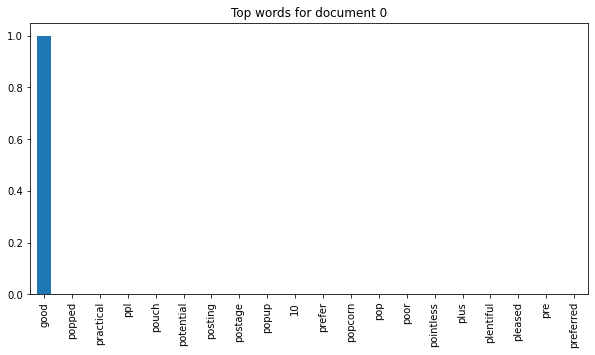

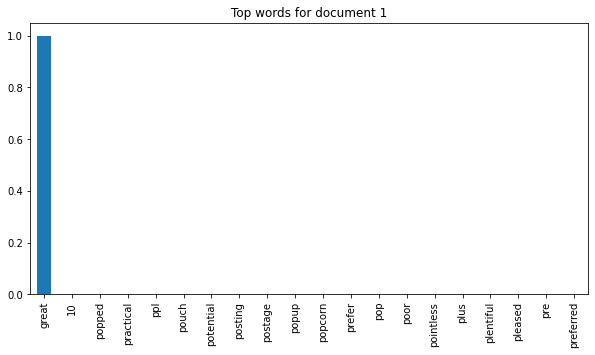

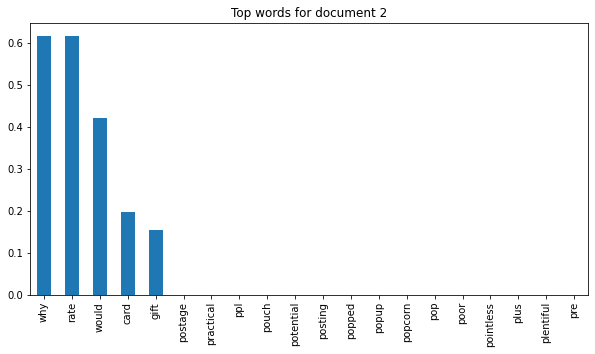

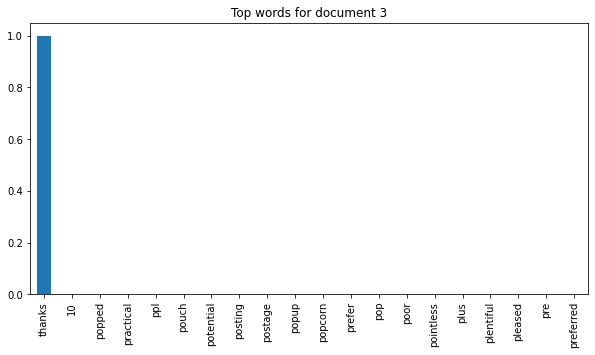

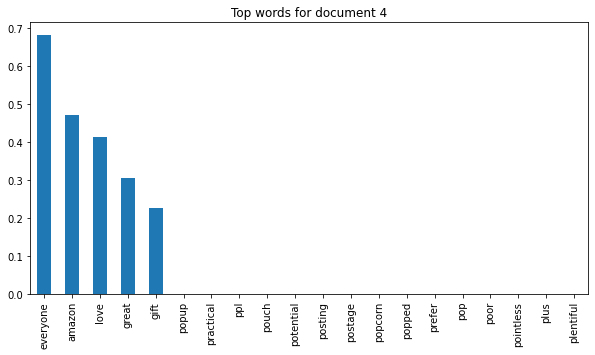

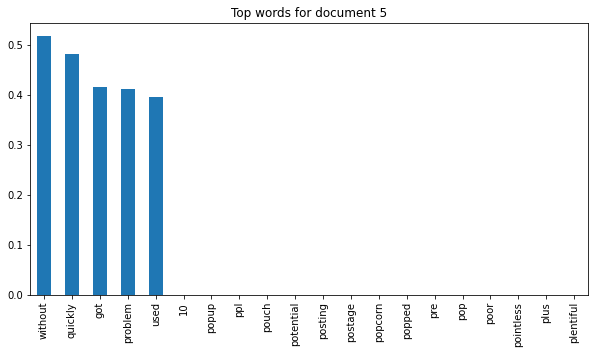

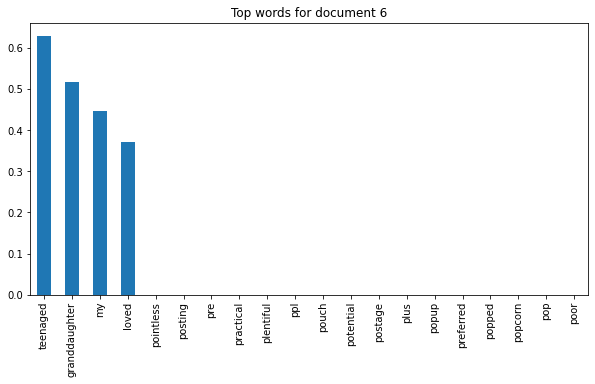

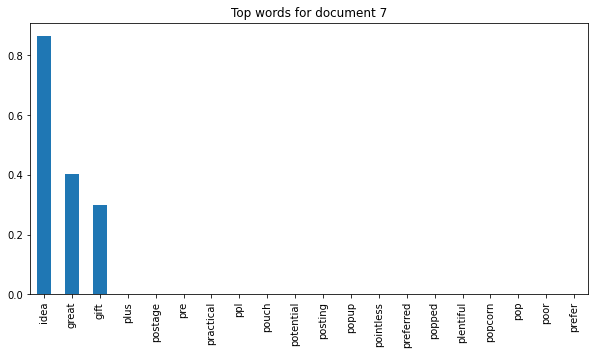

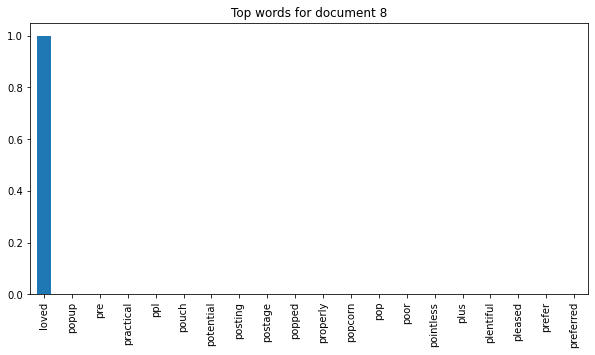

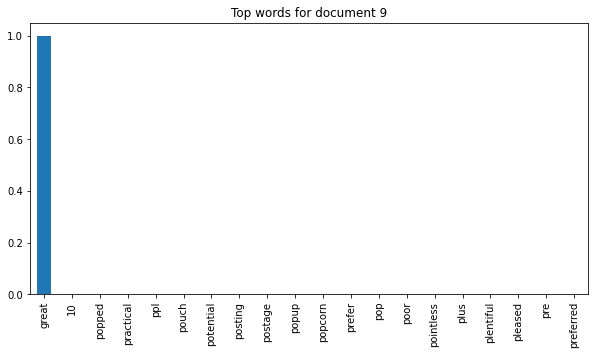

In [1070]:
#dataframe to store the TF-IDF values
df_tfidf = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())

#bar plot for top words for first 5 document in data
for i in range(10):
    plt.figure(figsize=(10,5))
    df_tfidf.loc[i].sort_values(ascending=False).head(20).plot(kind='bar')
    plt.title("Top words for document {}".format(i))
    plt.show()

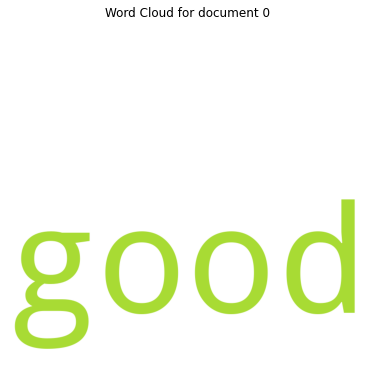

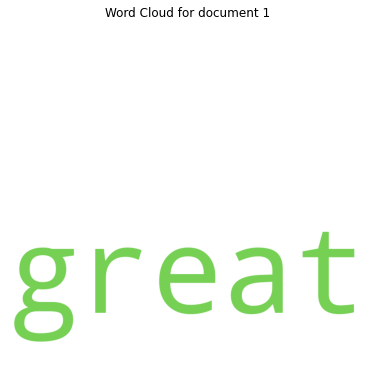

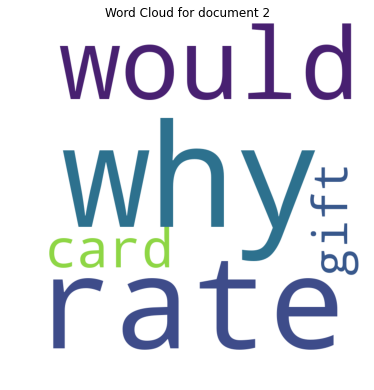

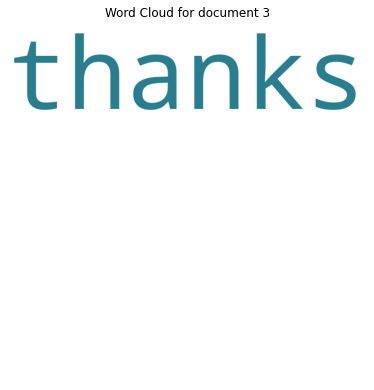

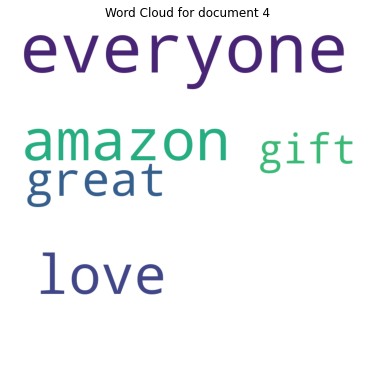

In [1071]:
from wordcloud import WordCloud
#Word clouds for first 5 document in the data
for i in range(5):
    plt.figure(figsize=(10,5))
    wordcloud = WordCloud(width=800, height=800, 
                background_color='white', 
                stopwords=None, 
                min_font_size = 10).generate_from_frequencies(dict(df_tfidf.loc[i].sort_values(ascending=False))) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.title("Word Cloud for document {}".format(i))
    plt.show()

In [1072]:
#Sentiment analysis model using TextBlob
!pip install -U textblob

from textblob import TextBlob
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1073]:
df['polarity'] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
#df['subjectivity'] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df['sentiment_textBlob'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [1074]:
df['sentiment_textBlob'].value_counts()

positive    574
neutral     159
negative    32 
Name: sentiment_textBlob, dtype: int64

In [1075]:
#Sentiment analysis model using SentiWordNet 
import nltk
from nltk.corpus import sentiwordnet as swn
import pandas as pd
nltk.download('punkt')
nltk.download('sentiwordnet')
def sentiwordnet_sentiment(text):
    sentiment = 0.0
    tokens = nltk.word_tokenize(text)   
    for token in tokens:
        try:
            senti_synset = list(swn.senti_synsets(token))[0]
            sentiment += senti_synset.pos_score() - senti_synset.neg_score()
        except:
            pass   
    return sentiment
    




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [1076]:
df['sentiment_SentiWordNet'] = df['reviewText'].apply(lambda x: sentiwordnet_sentiment(x))

In [1077]:
df['sentiment_SentiWordNet'].value_counts()

 0.000     291
 0.250     136
 0.500     36 
 0.375     36 
 0.750     35 
 0.625     27 
 0.875     27 
 0.125     23 
 1.000     16 
 1.250     12 
 1.125     10 
-0.125     10 
-0.500     9  
-0.250     9  
 1.375     9  
-0.375     8  
-0.875     7  
 1.500     7  
 1.625     6  
-0.625     5  
 1.875     4  
 1.750     4  
 2.500     3  
-1.125     3  
 3.750     3  
 2.625     3  
 2.875     2  
 5.500     2  
-0.750     1  
 3.875     1  
 2.750     1  
 2.125     1  
 3.250     1  
 2.250     1  
 2.375     1  
 10.750    1  
 5.875     1  
 4.125     1  
 4.000     1  
-2.375     1  
 2.000     1  
-1.250     1  
 5.625     1  
-2.250     1  
 4.375     1  
 4.625     1  
 4.250     1  
-1.000     1  
-1.500     1  
 5.125     1  
Name: sentiment_SentiWordNet, dtype: int64

In [1078]:
df['sentiment_SentiWordNet'] = df['sentiment_SentiWordNet'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [1079]:
df['sentiment_SentiWordNet'].value_counts()

positive    417
neutral     291
negative    57 
Name: sentiment_SentiWordNet, dtype: int64

In [1080]:
# Save the DataFrame as a CSV file
df.to_csv('my_data.csv', index=False)

# Load the CSV file into a new DataFrame
new_df = pd.read_csv('my_data.csv')

# Print the new DataFrame 
print(new_df)

                                                                                                                     reviewText  \
0    [ 'good ' ]                                                                                                                  
1    [ 'great ' ]                                                                                                                 
2    [ 'why would rate gift card ' ]                                                                                              
3    [ 'thanks ' ]                                                                                                                
4    [ 'great gift everyone love amazon ' ]                                                                                       
..                                      ...                                                                                       
760  [ 'satisfied ' ]                                                              